In [18]:
"""
[クラスタリング]
物事を似た者同士が同じグループになるように分類するプロセスとして定義される.
もっともよく使われる教師なし学習の技術は, クラスタリングである.

クラスタリングは1つの最適化問題である.
ある制約のもとである目的関数を最適化するクラスタの集合を求めることがゴールである.
2つの標本がどれだけ近いかを表す距離という計量が与えられているとき, 同じクラスタに属している標本間の距離を最小化する.
つまりクラスタ内の標本間の創意性を最小化するように目的関数を設定する必要がある.
"""
pass

In [17]:
"""
[変動性]
クラスタ内の標本同士がどれくらい異なっているか、という分散に似た基準として、変動性と呼ばれるものがある.

変動制は,
variability(c) = sum(distance(mean(c), e)**2)
で定義される.

mean(c)は, クラスタc内の全てのサンプルの特徴ベクトルの平均である. ベクトルの平均とは, 成分ごとに平均を計算したものである.

単一のクラスタでの分散の定義は, 次のようにクラスタ集合Cの相違性を定義するのに拡張される.

dissimilarity(C) = sum(variability(c))

変動性をクラスタのサイズで割っていないため, サイズが大きいほど相違性が増えることに注意.
そういう設計である.

"""
pass

In [6]:
"""
[k-平均クラスタリング(k-means clustering)]
もっとも広く利用されているクラスタリング手法

標本の集合を次の２つの条件を満たすようにk個のクラスタに分割する
1. それぞれの標本は, その標本がもっとも近い重心に対するクラスタに属する.
2. クラスタ集合全体の相違性が最小化されている.

最適解を見つけることは計算上、手に負えないものである. ただし良い近似解を見つけるのに利用される効率的な貪欲アルゴリズムがある.

- 擬似コード
k個の標本を, 初期のk個の重心として選ぶ
以下を繰り返す:
    1) 各標本を最も近い重心に対するクラスタに割り当て, k個のクラスタを作る
    2) 新たなk個の重心として, それぞれのクラスタ内にある標本の平均を計算する
    3) どの重心も, 前の繰り返しのものと変化なければ, 今現在のクラスタ集合を返す
    
k-平均法の1つの問題は, 返ってくる値がランダムに選んだ初期の重心に依存するということである.
重心の初期値が明らかに不運だったなら, アルゴリズムは大域的最適化からほど遠い局所最適解に陥ってしまう.
実際には, この問題は初期値の重心をランダムに選んでk-平均法をなんども実行し, 最小の相違性を持つクラスタリングを選ぶことによって解決される.
"""
pass

In [5]:
import pylab

def minkowskiDist(v1, v2, p):
    """v1, v2は長さの等しい数値数列であるとする
       v1, v2の, p次のミンコウスキ距離を返す"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [7]:
class Example(object):
    """標本を表すクラス"""

    def __init__(self, name, features, label = None):
        # featuresはfloatからなる配列である
        self.name = name
        self.features = features
        self.label = label

    def dimentionality(self):
        """特徴点を返す"""
        return len(self.features)

    def getFeatures(self):
        return self.features[:]

    def getLabel(self):
        return self.label

    def getName(self):
        return self.name

    def distance(self, other):
        """他の標本とのミンコウスキ距離を返す"""
        return minkowskiDist(self.features, other.getFeatures(), 2)

    def __str__(self):
        return self.name + ':' + str(self.features) + ':' + self(self.label)

In [79]:
class Cluster(object):

    def __init__(self, examples):
        """examplesはExampleの, 空でないリストとする"""
        self.examples = examples
        self.centroid = self.computeCentroid()

    def update(self, examples):
        """examplesはExampleの, 空でないリストとする
           examplesを更新し, 重心の変化の総量を返す"""
        oldCentroid = self.centroid
        self.examples = examples
        self.centroid = self.computeCentroid()
        return oldCentroid.distance(self.centroid)

    def computeCentroid(self):
        """クラスターの重心を計算する
        　　　　　重心: クラスター内の標本の特徴点の平均"""
        vals = pylab.array([0.0] * self.examples[0].dimentionality())
        for e in self.examples: # 平均を計算
            vals += e.getFeatures()
        centroid = Example('centroid', vals/len(self.examples))
        return centroid

    def getCentroid(self):
        return self.centroid

    def variability(self):
        """クラスターの変動率を返す
             変動率: (重心と各標本の距離の差)**2として計算する"""
        totDist = 0.0
        for e in self.examples:
            totDist += (e.distance(self.centroid))**2
        return totDist

    def members(self):
        for e in self.examples:
            yield e

    def __str__(self):
        names = []
        for e in self.examples:
            names.append(e.getName())
        names.sort()
        result = 'Cluster with centroid ' + str(self.centroid.getFeatures()) + ' contains:\n '
        for e in names:
            result = result + e + ', '
        return result[:-2] # remove comma and space

In [66]:
import random
import pylab

def dissimilarity(clusters):
    """クラスタリングの相違性を計算する
         相違性: 各クラスターの変動率の合計として計算する"""
    totDist = 0.0
    for c in clusters:
        totDist += c.variability()
    return totDist

def trykmeans(examples, numClusters, numTrials, verbose = False):
    """kmeans関数をnumTrials回呼び出し, もっとも類似性が小さいクラスタリングを返す"""
    best = kmeans(examples, numClusters, verbose)
    minDissimilarity = dissimilarity(best)
    trial = 1
    while trial < numTrials:
        try:
            clusters = kmeans(examples, numClusters, verbose)
        except ValueError:
            continue
        currDissimilarity = dissimilarity(clusters)
        if currDissimilarity < minDissimilarity:
            beest = clusters
            minDissimilarity = currDissimilarity
        trial += 1
    return best

def kmeans(examples, k, verbose = False):
    """初期のk個のランダムな重心を選び, それぞれに重心に対してクラスタを生成する"""
    initialCentroids = random.sample(examples, k)
    clusters = []
    for e in initialCentroids:
        clusters.append(Cluster([e]))

    # 重心が変化しなくなるまで繰り返す
    converged = False # 収束したか否かのフラグ
    numIterations = 0
    while not converged:
        numIterations += 1
        # k個の空のリストからなるリストを作る
        newClusters = []
        for i in range(k):
            newClusters.append([])
        # 標本それぞれeについて
        for e in examples:
            # eに最も近い重心を見つける
            smallestDistance = e.distance(clusters[0].getCentroid())
            index = 0
            for i in range(1, k):
                distance = e.distance(clusters[i].getCentroid())
                if distance < smallestDistance:
                    smallestDistance = distance
                    index = i
            # 適切なクラスターの標本リストにeを加える
            newClusters[index].append(e)
        # 空のクラスターを避ける
        for c in newClusters:
            if len(c) == 0:
                raise ValueError('Empty Cluster')
        # クラスターを更新する; 重心が変化しているかチェック
        converged = True
        for i in range(k):
            if clusters[i].update(newClusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(numIterations))
            for c in clusters:
                print(c)
            print('') # 空行
    return clusters

def genDistribution(xMean, xSD, yMean, ySD, n, namePrefix):
    samples = []
    for s in range(n):
        x = random.gauss(xMean, xSD) # 平均, 分散を指定してランダム値を生成
        y = random.gauss(yMean, ySD)
        samples.append(Example(namePrefix + str(s), [x, y]))
    return samples

def plotSamples(samples, marker):
    xVals, yVals = [], []
    for s in samples:
        x = s.getFeatures()[0]
        y = s.getFeatures()[1]
        pylab.annotate(
            s.getName(),
            xy = (x,y),
            xytext = (x+0.13, y-0.07),
            fontsize = 'x-large')
        xVals.append(x)
        yVals.append(y)
    pylab.plot(xVals, yVals, marker)
    
def contrivedTest(numTrials, k, verbose = False):
    xMean = 3
    xSD = 1
    yMean = 5
    ySD = 1
    n = 10
    d1Samples = genDistribution(xMean, xSD, yMean, ySD, n, 'A')
    plotSamples(d1Samples, 'k^')
    d2Samples = genDistribution(xMean + 3, xSD, yMean + 1, ySD, n, 'B')
    plotSamples(d2Samples, 'ko')
    d3Samples = genDistribution(xMean, xSD, yMean + 3, ySD, n, 'C')
    plotSamples(d3Samples, 'kx')
    # k-平均法を実行
    clusters = trykmeans(d1Samples + d2Samples + d3Samples, k, numTrials, verbose)
    pylab.ylim(0, 11)
    print('Final result has dissimilarity', round(dissimilarity(clusters), 3))
    for c in clusters:
        print('', c)


Iteration #1
Cluster with centroid [2.77125245 6.94852081] contains:
 A2, A5, A8, C0, C1, C2, C3, C4, C5, C6, C7, C8, C9
Cluster with centroid [4.57691177 5.55916852] contains:
 A0, A1, A3, A4, A6, A7, A9, B0, B1, B2, B3, B4, B5, B6, B7, B8, B9

Iteration #2
Cluster with centroid [2.85450574 7.10490975] contains:
 A2, A5, A6, A8, C0, C1, C2, C4, C5, C6, C7, C8, C9
Cluster with centroid [4.51324748 5.43957698] contains:
 A0, A1, A3, A4, A7, A9, B0, B1, B2, B3, B4, B5, B6, B7, B8, B9, C3

Iteration #3
Cluster with centroid [2.82716168 7.21851633] contains:
 A2, A5, A6, C0, C1, C2, C4, C5, C6, C7, C8, C9
Cluster with centroid [4.43932454 5.45635775] contains:
 A0, A1, A3, A4, A7, A8, A9, B0, B1, B2, B3, B4, B5, B6, B7, B8, B9, C3

Iteration #4
Cluster with centroid [2.82716168 7.21851633] contains:
 A2, A5, A6, C0, C1, C2, C4, C5, C6, C7, C8, C9
Cluster with centroid [4.43932454 5.45635775] contains:
 A0, A1, A3, A4, A7, A8, A9, B0, B1, B2, B3, B4, B5, B6, B7, B8, B9, C3

Final result has

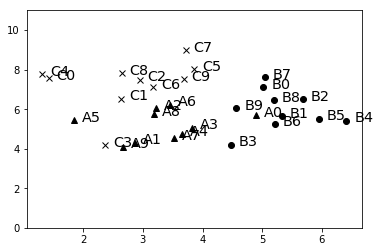

In [78]:
contrivedTest(1, 2, True)

Final result has dissimilarity 85.291
 Cluster with centroid [2.82922807 7.40135967] contains:
 A1, A2, A3, A6, A7, A8, C0, C1, C2, C3, C4, C5, C6, C7, C8, C9
 Cluster with centroid [5.96623246 5.46546383] contains:
 A0, A4, A5, A9, B0, B1, B2, B3, B4, B5, B6, B7, B8, B9


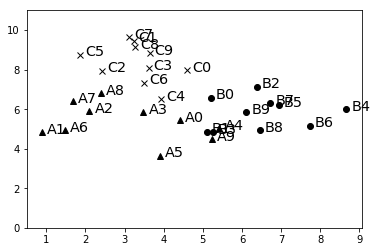

In [76]:
contrivedTest(5, 2)

Final result has dissimilarity 99.649
 Cluster with centroid [2.63401686 8.47590535] contains:
 A7, C0, C1, C4, C6, C7, C8, C9
 Cluster with centroid [4.50480487 5.68487199] contains:
 A0, A1, A2, A3, A4, A5, A6, A8, A9, B0, B1, B2, B3, B4, B5, B6, B7, B8, B9, C2, C3, C5


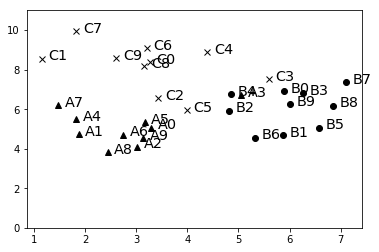

In [58]:
contrivedTest(40, 2)

Final result has dissimilarity 28.404
 Cluster with centroid [3.21317809 7.43868018] contains:
 A4, A5, A7, B5, C0, C1, C2, C3, C4, C5, C6, C7, C8, C9
 Cluster with centroid [3.08322255 4.78761588] contains:
 A0, A1, A2, A3, A6, A8, A9, B2
 Cluster with centroid [5.95280842 6.07518011] contains:
 B0, B1, B3, B4, B6, B7, B8, B9


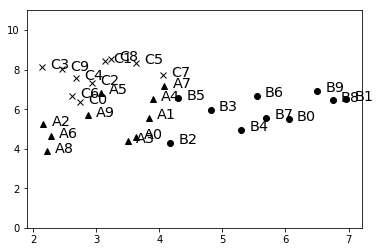

In [59]:
contrivedTest(40, 3)

Final result has dissimilarity 9.571
 Cluster with centroid [3.6494109  4.77072458] contains:
 A1, A3, A7, A8, A9
 Cluster with centroid [5.98474814 6.7458711 ] contains:
 B0, B1, B2, B5, B6
 Cluster with centroid [2.73042903 5.90184625] contains:
 A0, A2, A4, A5, C2, C4, C5
 Cluster with centroid [7.86072759 6.85238384] contains:
 B4, B9
 Cluster with centroid [2.62504678 7.54800221] contains:
 A6, C0, C1, C3, C6, C7, C8, C9
 Cluster with centroid [5.83689283 5.23311955] contains:
 B3, B7, B8


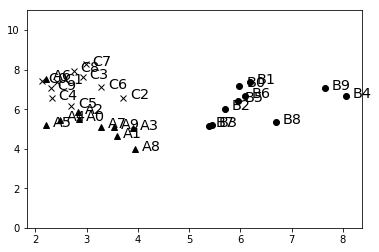

In [81]:
contrivedTest(40, 6)

"""
このクラスタリングが最もフィットしている. つまり、最小の相違性を持っている.
これは最前のクラスタリングという意味だろうか？
必ずしもそういうわけではない.
多項式の次数をあげると, データに過剰に適合してしまうので, 貧弱な予測値しか得られないモデルができてしまう危険がある.
これは線形回帰の場合の多項式の正しい次数を選ぶことに似ている.
kを決定する様々な発見的手法が存在する.
"""
pass